## 모델 불러오기

In [2]:
## 라이브러리 설치
##pip install trimesh

In [3]:
import trimesh
model = trimesh.load('./obj/model.stl')
model.show()

In [4]:
## 모델 내 중복된 꼭지점 합치기
## trimesh에서는 필요없음
model.merge_vertices()
# 변수에 저장
vertices = model.vertices

## 시각화

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# plt.scatter(vertices[:,0], vertices[:,1])
# plt.scatter(vertices[:,0], vertices[:,2])
# plt.scatter(vertices[:,1], vertices[:,2])

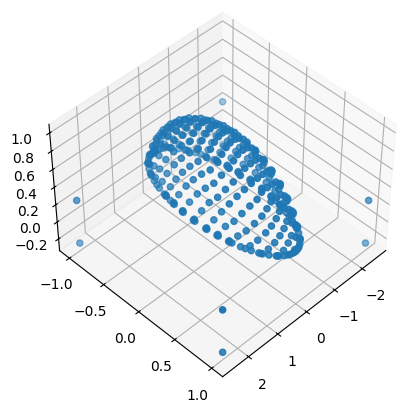

In [7]:
## 꼭지점 scatter
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=45, azim=45)
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2])


## 샘플 추출
https://trimesh.org/trimesh.sample.html

In [8]:
##sample_surface_even()은 샘플들이 서로 가까이 붙지않도록 배치
samples = trimesh.sample.sample_surface_even(model, 300)
points = samples[0]
points

TrackedArray([[ 4.37051855e-01, -2.19230707e-01, -2.50000000e-01],
              [-5.54990626e-01,  8.76382282e-01,  2.50000000e-01],
              [-8.56464453e-01,  8.27816546e-01,  2.50000000e-01],
              [ 6.82435937e-01, -6.01055233e-01,  4.12429305e-01],
              [-1.41333448e-02, -6.15798980e-01,  7.83514357e-01],
              [-2.04066910e+00, -1.20129344e-01,  2.50000000e-01],
              [ 4.39505510e-02,  8.80937427e-01,  4.63431261e-01],
              [ 1.31595748e+00,  4.05354217e-01,  2.50000000e-01],
              [-1.01945201e+00,  4.38598231e-01, -2.50000000e-01],
              [-2.09048457e+00, -5.68114103e-01,  2.50000000e-01],
              [ 2.06393296e-01, -5.75060587e-01,  7.88516096e-01],
              [ 6.60221874e-01,  3.45070897e-01, -2.50000000e-01],
              [-5.29481950e-01,  6.08874696e-01, -2.50000000e-01],
              [-5.16101896e-01, -1.00000000e+00,  6.54550588e-02],
              [-8.86680972e-02, -1.00000000e+00,  8.34346168e-

In [9]:
## 거리상관 없이 임의의 점을 샘플링 할 때,

# import random
# import pandas as pd
# 
# sample_rand = trimesh.sample.sample_surface_even(model, 1000)
# points_rand = list(sample_rand[0])
# points_res = random.sample(points_rand, 100)
# 
# df_test = pd.DataFrame(points_res)
# df_test.to_csv('../3D/data/test.csv', index=False)

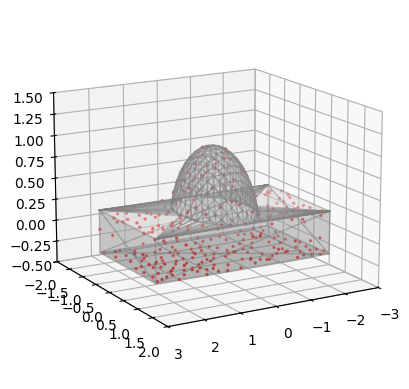

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

## 점들 표시
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red', s=2)
## mesh 표현
ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha= 0.3, edgecolor='gray')

## 보이는 각도 조정
ax.view_init(elev=15, azim=60)

## 축 크기 조정
plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

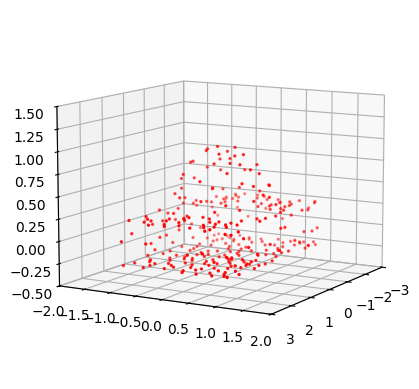

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha=0.5, edgecolor='gray', zorder=1)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red', zorder=1, s=2)

ax.view_init(elev=10, azim=30)

plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

## 확률 밀도 함수 추정
### scipy 내 parzen method는 1차원 윈도우만 생성
https://sebastianraschka.com/Articles/2014_kernel_density_est.html

## 데이터 CSV로 저장

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame(points)

In [14]:
df

,0,1,2
0,0.437052,-0.219231,-0.250000
1,-0.554991,0.876382,0.250000
2,-0.856464,0.827817,0.250000
3,0.682436,-0.601055,0.412429
4,-0.014133,-0.615799,0.783514
...,...,...,...
295,1.054327,-0.307280,0.250000
296,0.810218,0.090794,0.573688
297,1.557925,0.809735,-0.250000
298,2.039884,-0.602070,0.250000


In [15]:
df.to_csv("../3D/data/points.csv", index=False)

## 데이터 호출

In [16]:
## 불러온 값은 함수값이 아님!! 밀도값임!
## 밀도값 -> 함수값으로 변환 필요
dens = pd.read_csv("../3D/data/density.csv")
# dens
# type(dens)

In [17]:
total = dens.sum().sum()

In [18]:
pdf = dens/total
# pdf
# type(pdf)
pdf.sum().sum()

0.9999999999999999

 H[X] = –∫S p(x) log p(x)dx = –E{log p(X)}
 
When we have a sufficient number of points sampled from p, we can approximate
the expectation by the sample mean [8], which gives  H[X] = -(1/N) sigma log p(x). 


![01](./obj/img01.png)
    
![02](./obj/img02.png)


In [19]:
enp = np.log2(pdf).sum().sum()
enp

-19433861.317082167

https://github.com/cran/misc3d/blob/master/R/kde3d.R

## 점들의 위치 재조정하기

### 표면 위의 점인지 확인

### 점 위치 조정 > 표면 위 점인지 확인하는 작업 필요할 듯


표면에서 tangent vector를 따라 이동하고,
gradient descent와 Euler method를 적용


In [20]:
len(points)

300

In [21]:
# from scipy.spatial import cKDTree
# 
# tree = cKDTree(points)
# d, index = tree.query(points[0], k=2)
# d[1], index[1]

In [22]:
from scipy.spatial import cKDTree

# 점 집합 복사본
copyPoints = points.copy()

# 0본 인덱스를 시작으로 가까운 점 정렬
sort_neighbor = []
sort_neighbor.append(points[0])

# 정렬한 리스트로 들어간 점들은 삭제
copyPoints = np.delete(copyPoints, 0, axis=0)

while copyPoints.size > 0:
    # kdree 사용
    tree = cKDTree(copyPoints)
    d, index = tree.query(sort_neighbor[-1], k=1)
    
    # 가까운 점 추가
    sort_neighbor.append(copyPoints[index])
    
    # 정렬한 리스트로 들어간 점들은 삭제
    copyPoints = np.delete(copyPoints, index, axis=0)

# # 정렬된 점들을 numpy 배열로 변환
sorted_points = np.array(sort_neighbor)

# 차분을 통해 탄젠트 벡터 계산
tangent_vectors = np.diff(sorted_points, axis=0)

# 단위 벡터로 표준화 (길이가 1인 벡터)
tangent_vectors_normalized = tangent_vectors / np.linalg.norm(tangent_vectors, axis=1)[:, np.newaxis]

In [23]:
normals = []
num_points = len(sorted_points) - 2

for i in range(num_points):
    # 세 개의 인접한 점을 선택 (간단히 인덱스를 기준으로 선택)
    p1 = np.array(sorted_points[i])
    p2 = np.array(sorted_points[(i + 1)])  # 다음 점
    p3 = np.array(sorted_points[(i + 2)])  # 다다음 점
    
    # 법선 벡터 계산
        # 벡터 v1 = p2 - p1, v2 = p3 - p1
    v1 = np.subtract(p2, p1)
    v2 = np.subtract(p3, p1)
    
    # 벡터곱 (크로스 곱)으로 법선 벡터 계산
    normal = np.cross(v1, v2)
    
    # 정규화 (길이 1로 만들기)
    norm = np.linalg.norm(normal)
    if norm != 0:
        normal = normal / norm
    
    normals.append(normal)

In [24]:
# tvec = np.diff(normals)
normals = np.array(normals)
normals

array([[ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00

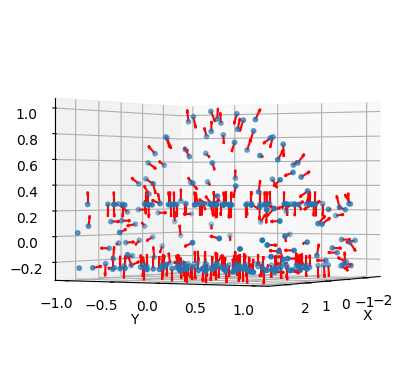

In [25]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(sorted_points[:, 0], sorted_points[:, 1], sorted_points[:, 2], marker='o', s=10, label="Points")

# 법선 벡터 시각화
for i, normal in enumerate(normals):
    ax.quiver(sorted_points[i, 0], sorted_points[i, 1], sorted_points[i, 2],
              normal[0], normal[1], normal[2], color='red', length=0.1)

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')  
ax.set_zlabel('Z')
ax.view_init(elev=0, azim=30)

# 플롯 보여주기
plt.show()

In [26]:
# sort_neighbor
# tangent_vectors

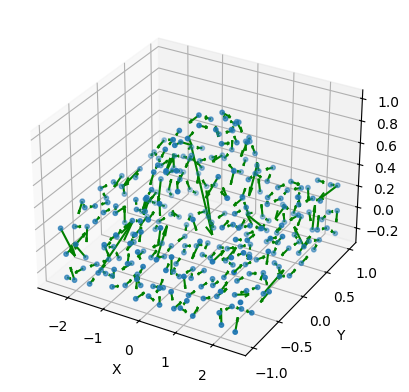

In [27]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(sorted_points[:, 0], sorted_points[:, 1], sorted_points[:, 2], marker='o', s=10, label="Points")

# 각 점에서 탄젠트 벡터 그리기
# for i in range(len(tangent_vectors_normalized)):
#     ax.quiver(sorted_points[i, 0], sorted_points[i, 1], sorted_points[i, 2],
#               tangent_vectors_normalized[i, 0], tangent_vectors_normalized[i, 1], tangent_vectors_normalized[i, 2],
#               length=0.1, color='r')
    
# 각 점에서 탄젠트 벡터 그리기
for i in range(len(tangent_vectors)):
    ax.quiver(sorted_points[i, 0], sorted_points[i, 1], sorted_points[i, 2],
              tangent_vectors[i, 0], tangent_vectors[i, 1], tangent_vectors[i, 2],
              length=0.5, color='g')

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')  
ax.set_zlabel('Z')
# ax.view_init(elev=30, azim=60)

# 플롯 보여주기
plt.show()

## 이동시키는 법
### 벡터에 스칼라값 곱해서
점 위치를 동일하게 떨어뜨리기 필요

In [28]:
## 점 이동 시키기
point_moved = sorted_points.copy()
point_moved[1:] = point_moved[1:] + 0.5 * tangent_vectors
point_moved

array([[ 4.37051855e-01, -2.19230707e-01, -2.50000000e-01],
       [ 2.91154475e-01, -4.94151324e-01, -2.50000000e-01],
       [ 7.85361776e-02, -1.70887371e-01, -2.50000000e-01],
       [ 1.98083385e-03, -5.26239437e-01, -2.50000000e-01],
       [-2.99177531e-01, -3.62927548e-01, -2.50000000e-01],
       [-3.67764661e-01, -1.84593075e-01, -2.50000000e-01],
       [-4.50856694e-01,  7.59080353e-02, -2.50000000e-01],
       [-6.13971162e-01,  1.38107076e-01, -2.50000000e-01],
       [-1.74761152e-01,  1.65930208e-01, -2.50000000e-01],
       [-2.94116211e-02,  2.93028922e-01, -2.50000000e-01],
       [ 1.16336344e-01, -8.43430436e-02, -2.50000000e-01],
       [ 4.04796230e-01,  2.19720270e-03, -2.50000000e-01],
       [ 1.95242235e-01,  3.44266567e-01, -2.50000000e-01],
       [ 5.31668033e-01,  2.49753569e-01, -2.50000000e-01],
       [ 7.75721337e-01,  3.95574192e-01, -2.50000000e-01],
       [ 9.11432882e-01,  4.71716039e-01, -2.50000000e-01],
       [ 1.13478151e+00,  1.76180622e-01

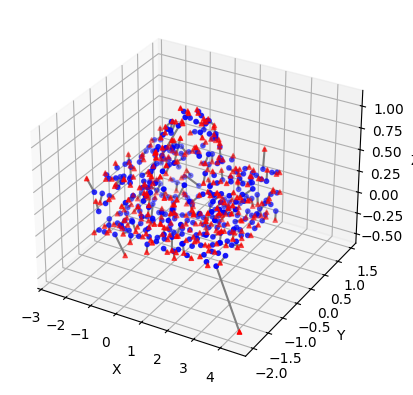

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(point_moved[:, 0], point_moved[:, 1], point_moved[:, 2], marker='^', s=10, color="red")
ax.scatter(sorted_points[:, 0], sorted_points[:, 1], sorted_points[:, 2], marker='o', s=10, color="blue")

# 같은 인덱스끼리 선으로 연결
for i in range(len(points)):
    ax.plot([sorted_points[i, 0], point_moved[i, 0]], 
            [sorted_points[i, 1], point_moved[i, 1]], 
            [sorted_points[i, 2], point_moved[i, 2]], color="gray", linestyle="-")

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.view_init(elev=30, azim=60)

# 플롯 보여주기
plt.show()

점들의 법선벡터 구하고 법선벡터의 수직인 벡터 차분

In [30]:
import open3d as o3d
import numpy as np

# 이미 추출된 점들을 numpy 배열로 변환
# points = np.array([[x1, y1, z1], [x2, y2, z2], ...])  # 추출된 표면의 점들

# 포인트 클라우드 생성
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

# 법선 벡터 계산 (k-인접한 이웃을 통해 법선 추정)
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamKNN(knn=50))

# 계산된 법선 벡터 출력
normals = np.asarray(pcd.normals)
print(normals)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[[-2.68106925e-01  1.85065513e-02  9.63211391e-01]
 [-1.42927254e-01  9.79304245e-01  1.43300370e-01]
 [ 1.25982629e-01 -5.43027266e-02 -9.90545098e-01]
 [ 5.06945179e-01 -5.90450831e-01  6.27992357e-01]
 [ 4.58108475e-03 -6.48694038e-01  7.61035517e-01]
 [ 3.55471380e-02 -3.12729606e-02 -9.98878573e-01]
 [-1.25241026e-01 -9.27883121e-01 -3.51208769e-01]
 [ 7.70191212e-02  2.07797998e-01  9.75134887e-01]
 [ 7.93503361e-02 -1.72873881e-01  9.81742403e-01]
 [ 4.48975629e-02 -7.88530458e-02  9.95874694e-01]
 [ 2.34457530e-01 -6.33535376e-01  7.37334791e-01]
 [-1.08683947e-01 -1.44932874e-01  9.83454250e-01]
 [ 1.04430292e-01 -3.84474515e-01  9.17209715e-01]
 [ 1.49344410e-01  9.78415522e-01 -1.42826165e-01]
 [ 7.30014288e-02  9.96174242e-01 -4.80382265e-02]
 [ 1.19785369e-01  1.17530021e-02  9.92730241e-01]
 [-5.46581756e-

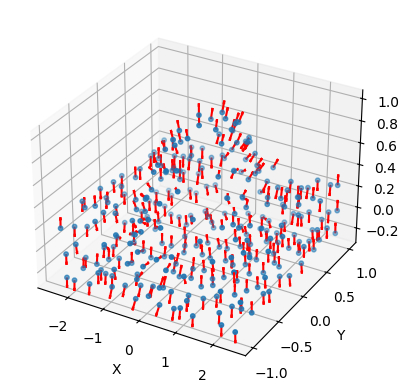

In [31]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(points[:, 0], points[:, 1], points[:, 2], marker='o', s=10, label="Points")

# 법선 벡터 시각화
for i, normal in enumerate(normals):
    ax.quiver(points[i, 0], points[i, 1], points[i, 2],
              normal[0], normal[1], normal[2], color='red', length=0.1)

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')  
ax.set_zlabel('Z')
# ax.view_init(elev=0, azim=120)

# 플롯 보여주기
plt.show()